# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

The goal of my final project is going to be to support my capstone work. For my capstone, I am making the case for a city supported social housing program in Richmond, CA that is CLT operated via RichmondLAND. To give context to my project, I want to include relevant housing and income data. Much of this will be from Census Data. I want to include information on tenure status, income in the last 12 months, eviction rates, vacant and city owned land, rent burden rates, home values, and home prices. I also want to include stats on LIHTC creation to make the case that current development processes are not meeting demand, and that publically funded housing is crucial. I may add to this data and refine as necessary. 

In [2]:
import pandas as pd


In [3]:
raw = pd.read_csv('data/tenure.csv')

In [4]:
print(raw.head())

                 GEO_ID                                               NAME  \
0             Geography                               Geographic Area Name   
1  1400000US06013301000  Census Tract 3010; Contra Costa County; Califo...   
2  1400000US06013302005  Census Tract 3020.05; Contra Costa County; Cal...   
3  1400000US06013302006  Census Tract 3020.06; Contra Costa County; Cal...   
4  1400000US06013302007  Census Tract 3020.07; Contra Costa County; Cal...   

        B25003_001E              B25003_001M  \
0  Estimate!!Total:  Margin of Error!!Total:   
1              1915                      227   
2              2279                      247   
3              1305                      198   
4              1989                      209   

                        B25003_002E                              B25003_002M  \
0  Estimate!!Total:!!Owner occupied  Margin of Error!!Total:!!Owner occupied   
1                              1388                                      187   
2 

In [5]:
null_values = raw.isnull().sum(axis = 1)

In [6]:
num_obs = len(raw[null_values>0])

In [7]:
print(num_obs, len(raw)) 

243 243


In [8]:
raw[null_values>0]

,GEO_ID,NAME,B25003_001E,B25003_001M,B25003_002E,B25003_002M,B25003_003E,B25003_003M,Unnamed: 8
0,Geography,Geographic Area Name,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Owner occupied,Margin of Error!!Total:!!Owner occupied,Estimate!!Total:!!Renter occupied,Margin of Error!!Total:!!Renter occupied,NaN
1,1400000US06013301000,Census Tract 3010; Contra Costa County; Califo...,1915,227,1388,187,527,210,NaN
2,1400000US06013302005,Census Tract 3020.05; Contra Costa County; Cal...,2279,247,1321,197,958,248,NaN
3,1400000US06013302006,Census Tract 3020.06; Contra Costa County; Cal...,1305,198,955,172,350,169,NaN
4,1400000US06013302007,Census Tract 3020.07; Contra Costa County; Cal...,1989,209,1438,201,551,142,NaN
...,...,...,...,...,...,...,...,...,...
238,1400000US06013392201,Census Tract 3922.01; Contra Costa County; Cal...,1687,238,1100,256,587,140,NaN
239,1400000US06013392202,Census Tract 3922.02; Contra Costa County; Cal...,1456,270,1122,142,334,273,NaN
240,1400000US06013392300,Census Tract 3923; Contra Costa County; Califo...,1051,116,754,84,297,118,NaN
241,1400000US06013980000,Census Tract 9800; Contra Costa County; Califo...,0,13,0,13,0,13,NaN


In [9]:
sub_df = raw.dropna().reset_index(drop = True)

In [10]:
sub_df.head()

,GEO_ID,NAME,B25003_001E,B25003_001M,B25003_002E,B25003_002M,B25003_003E,B25003_003M,Unnamed: 8


In [11]:
col_list = 'B25003_001E', 'B25003_002E', 'B25003_003E'
sub_df = pd.read_csv("data/tenure.csv",usecols=col_list)
sub_df

,B25003_001E,B25003_002E,B25003_003E
0,Estimate!!Total:,Estimate!!Total:!!Owner occupied,Estimate!!Total:!!Renter occupied
1,1915,1388,527
2,2279,1321,958
3,1305,955,350
4,1989,1438,551
...,...,...,...
238,1687,1100,587
239,1456,1122,334
240,1051,754,297
241,0,0,0


In [12]:
sub_df.columns

Index(['B25003_001E', 'B25003_002E', 'B25003_003E'], dtype='object')

In [13]:
sub_df.rename(columns={"B25003_001E":"total_all", 
                        "B25003_002E":"total_own", 
                        "B25003_003E":"total_rent",
                      }, inplace=True)

In [14]:
sub_df

,total_all,total_own,total_rent
0,Estimate!!Total:,Estimate!!Total:!!Owner occupied,Estimate!!Total:!!Renter occupied
1,1915,1388,527
2,2279,1321,958
3,1305,955,350
4,1989,1438,551
...,...,...,...
238,1687,1100,587
239,1456,1122,334
240,1051,754,297
241,0,0,0


In [15]:
sub_df = sub_df.drop(sub_df.index[0])

In [16]:
sub_df

,total_all,total_own,total_rent
1,1915,1388,527
2,2279,1321,958
3,1305,955,350
4,1989,1438,551
5,2111,1608,503
...,...,...,...
238,1687,1100,587
239,1456,1122,334
240,1051,754,297
241,0,0,0


In [17]:
sub_df['total_own'] = pd.to_numeric(sub_df['total_own'])
sub_df['total_all'] = pd.to_numeric(sub_df['total_all'])

In [18]:
sub_df['pct_own'] = (sub_df['total_own'] / sub_df['total_all']) * 100



In [19]:
print(sub_df)


     total_all  total_own total_rent    pct_own
1         1915       1388        527  72.480418
2         2279       1321        958  57.964019
3         1305        955        350  73.180077
4         1989       1438        551  72.297637
5         2111       1608        503  76.172430
..         ...        ...        ...        ...
238       1687       1100        587  65.204505
239       1456       1122        334  77.060440
240       1051        754        297  71.741199
241          0          0          0        NaN
242          0          0          0        NaN

[242 rows x 4 columns]


In [21]:
sub_df['total_rent'] = pd.to_numeric(sub_df['total_rent'])
sub_df['total_all'] = pd.to_numeric(sub_df['total_all'])

In [22]:
sub_df['pct_rent'] = (sub_df['total_rent'] / sub_df['total_all']) * 100


In [23]:
print(sub_df)

     total_all  total_own  total_rent    pct_own   pct_rent
1         1915       1388         527  72.480418  27.519582
2         2279       1321         958  57.964019  42.035981
3         1305        955         350  73.180077  26.819923
4         1989       1438         551  72.297637  27.702363
5         2111       1608         503  76.172430  23.827570
..         ...        ...         ...        ...        ...
238       1687       1100         587  65.204505  34.795495
239       1456       1122         334  77.060440  22.939560
240       1051        754         297  71.741199  28.258801
241          0          0           0        NaN        NaN
242          0          0           0        NaN        NaN

[242 rows x 5 columns]


In [30]:
average_pct_rent = sub_df['pct_rent'].mean()


In [31]:
average_pct_own = sub_df['pct_own'].mean()


In [32]:
print("Average Renter Percentage:", average_pct_rent)
print("Average Owner Percentage:", average_pct_own)

Average Renter Percentage: 32.04063308546576
Average Owner Percentage: 67.95936691453424


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
sns.set_style("whitegrid")


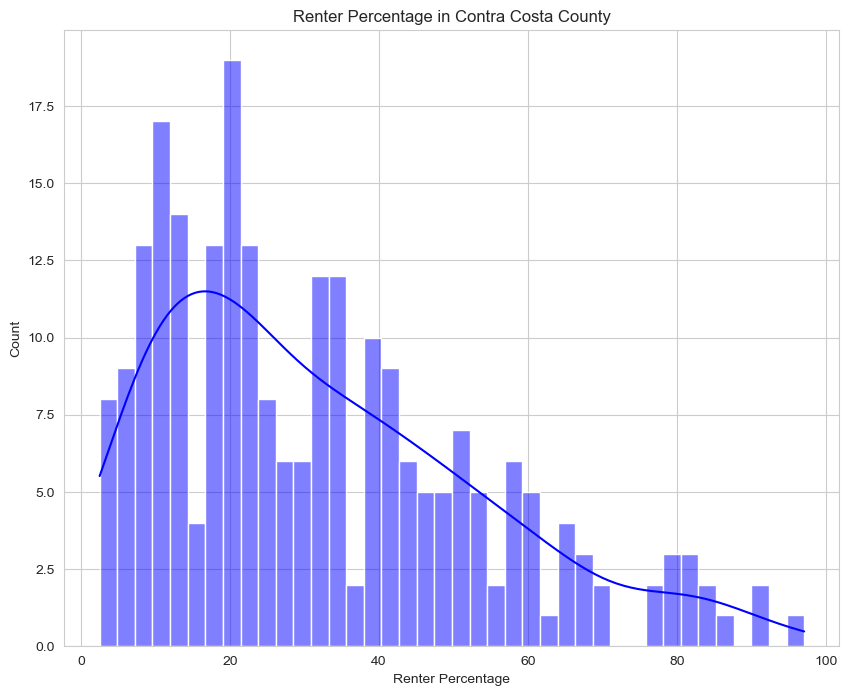

In [41]:
plt.figure(figsize=(10, 8))
sns.histplot(data=sub_df, x='pct_rent', bins=40, kde=True, color='blue')
plt.title('Renter Percentage in Contra Costa County')
plt.xlabel('Renter Percentage')
plt.ylabel('Count')
plt.show()

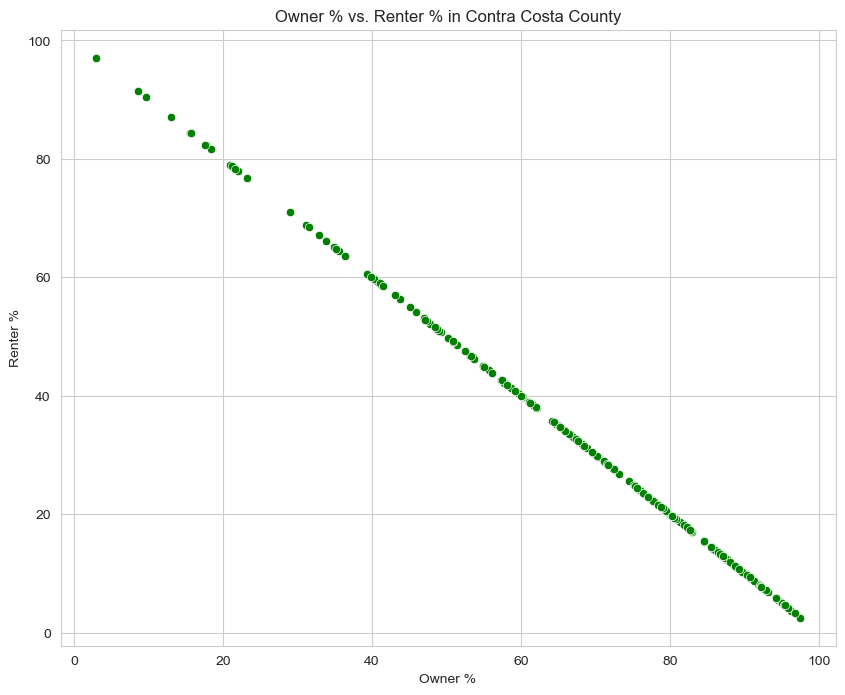

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=sub_df, x='pct_own', y='pct_rent', color='green')
plt.title('Owner % vs. Renter % in Contra Costa County')
plt.xlabel('Owner %')
plt.ylabel('Renter %')
plt.show()

I will need to do this exercise again with only Richmond data, and would like to compare the differences
between census tracts to get a better neighborhood context. But this was an initial start with getting comfortable using my own data. The majority of people in Richmond are homeowners, but I am curious how this will vary. This will also help inform whether a rental based or ownership based program makes the most sense. 

In [43]:
raw = pd.read_csv('data/LIHTC_Richmond.csv')

In [44]:
print(raw.head())

  HUD ID\nNumber:  Year               Project Name:  Project Address:  \
0     CAA20000225   2000   HERITAGE PARK AT HILLTOP  3811 LAKESIDE DR   
1     CAA20000330   2000             MONTEREY PINES     680 S 37TH ST   
2     CAA20020130   2002  DELIVERANCE TEMPLE I & II  4312 POTRERO AVE   
3     CAA20040445   2004        RICHMOND TOWNHOUSES  2989 PULLMAN AVE   
4     CAA20050095   2005     CHELSEY MUTUAL HOUSING   836 CHESLEY AVE   

  Project City: Project State:  Project ZIP Code:  Total Number of Units:  \
0      RICHMOND             CA              94806                     192   
1      RICHMOND             CA              94804                     324   
2      RICHMOND             CA              94804                      82   
3      RICHMOND             CA              94804                     199   
4      RICHMOND             CA              94801                      30   

   Total Low- Income Units: Compliance Monitoring Status  
0                       190            

In [45]:
null_values = raw.isnull().sum(axis = 1)

In [46]:
num_obs = len(raw[null_values>0])

In [47]:
print(num_obs, len(raw)) 

0 22


In [48]:
raw[null_values>0]

,HUD ID\nNumber:,Year,Project Name:,Project Address:,Project City:,Project State:,Project ZIP Code:,Total Number of Units:,Total Low- Income Units:,Compliance Monitoring Status


In [49]:
sub_df = raw.dropna().reset_index(drop = True)

In [50]:
sub_df.head()

,HUD ID\nNumber:,Year,Project Name:,Project Address:,Project City:,Project State:,Project ZIP Code:,Total Number of Units:,Total Low- Income Units:,Compliance Monitoring Status
0,CAA20000225,2000,HERITAGE PARK AT HILLTOP,3811 LAKESIDE DR,RICHMOND,CA,94806,192,190,Not Indicated
1,CAA20000330,2000,MONTEREY PINES,680 S 37TH ST,RICHMOND,CA,94804,324,259,Not Indicated
2,CAA20020130,2002,DELIVERANCE TEMPLE I & II,4312 POTRERO AVE,RICHMOND,CA,94804,82,80,Not Indicated
3,CAA20040445,2004,RICHMOND TOWNHOUSES,2989 PULLMAN AVE,RICHMOND,CA,94804,199,198,Not Indicated
4,CAA20050095,2005,CHELSEY MUTUAL HOUSING,836 CHESLEY AVE,RICHMOND,CA,94801,30,29,Not Indicated


In [64]:
col_list = 'Year ', 'Project ZIP Code:', 'Total Number of Units:', 'Total Low- Income Units:'
sub_df = pd.read_csv("data/LIHTC_Richmond.csv",usecols=col_list)
sub_df

,Year,Project ZIP Code:,Total Number of Units:,Total Low- Income Units:
0,2000,94806,192,190
1,2000,94804,324,259
2,2002,94804,82,80
3,2004,94804,199,198
4,2005,94801,30,29
5,2005,94804,51,50
6,2005,94804,67,65
7,2005,94806,342,340
8,2006,94804,123,83
9,2007,94804,378,376


In [70]:
yearly_totals_low = sub_df.groupby('Year ')[['Total Number of Units:', 'Total Low- Income Units:']].sum()


In [71]:
print(yearly_totals_low)


       Total Number of Units:  Total Low- Income Units:
Year                                                   
2000                      516                       449
2002                       82                        80
2004                      199                       198
2005                      490                       484
2006                      123                        83
2007                      378                       376
2008                       66                        65
2009                       36                        35
2010                       36                        35
2013                       63                        63
2014                      158                       156
2015                       99                        98
2016                      217                       214
2018                      138                       136
2019                       42                        41
2021                      271                   

In [73]:
total_low_income_units = sub_df['Total Low- Income Units:'].sum()


In [76]:
print(total_low_income_units)


2781


This is telling me that since 2000, 2781 low-income LIHTC units have been built in Richmond. I want to eventually compare this with what the actual need is, and show that LIHTC simply is not cutting it. 

In [82]:
col_list = 'Year ', 'Project ZIP Code:', 'Total Number of Units:', 'Total Low- Income Units:'
sub_df = pd.read_csv("data/LIHTC_Richmond.csv",usecols=col_list)
sub_df

,Year,Project ZIP Code:,Total Number of Units:,Total Low- Income Units:
0,2000,94806,192,190
1,2000,94804,324,259
2,2002,94804,82,80
3,2004,94804,199,198
4,2005,94801,30,29
5,2005,94804,51,50
6,2005,94804,67,65
7,2005,94806,342,340
8,2006,94804,123,83
9,2007,94804,378,376


In [85]:
average_low_income_units_per_project = df.groupby('Project ZIP Code:')['Total Low- Income Units:'].mean()


In [87]:
print(average_low_income_units_per_project)

Project ZIP Code:
94801     93.272727
94804    136.111111
94806    265.000000
Name: Total Low- Income Units:, dtype: float64


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Total Low-Income Units')

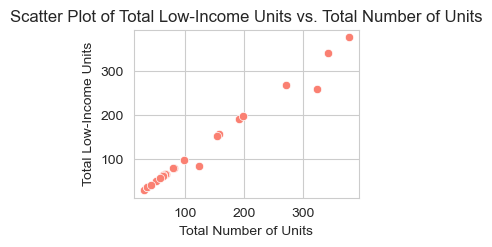

In [97]:
plt.subplot(2, 2, 2)
sns.scatterplot(x='Total Number of Units:', y='Total Low- Income Units:', data=df, color='salmon')
plt.title("Total Low-Income Units vs. Total Number of Units")
plt.xlabel("Total Number of Units")
plt.ylabel("Total Low-Income Units")

Text(0, 0.5, 'Total Low-Income Units')

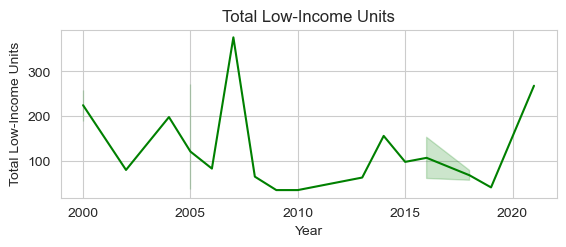

In [114]:
plt.subplot(2, 1, 2)
sns.lineplot(x='Year ', y='Total Low- Income Units:', data=df, color='green')
plt.title("Total Low-Income Units")
plt.xlabel("Year")
plt.ylabel("Total Low-Income Units")

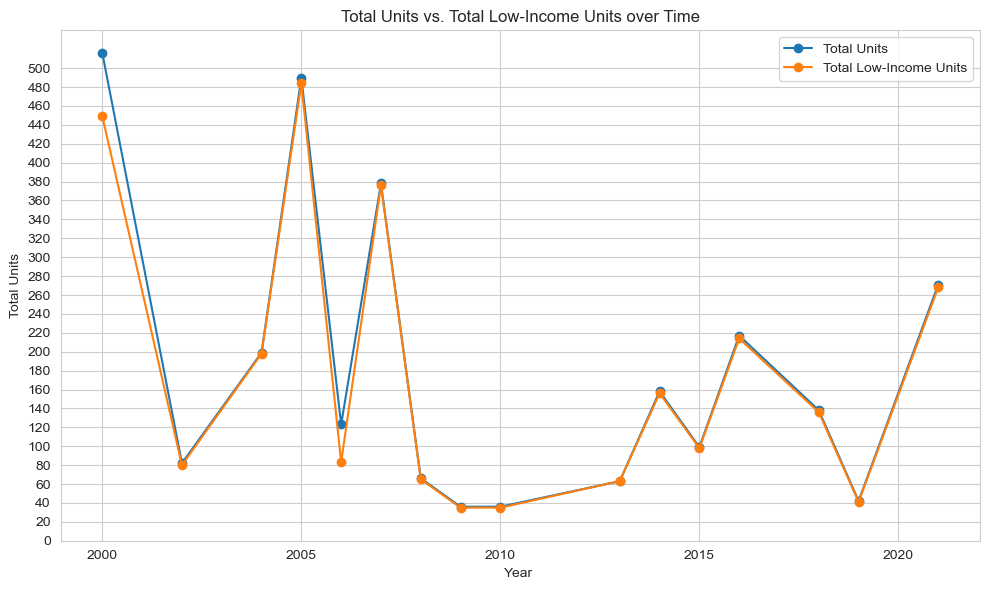

In [113]:
grouped_data = df.groupby('Year ').agg({'Total Number of Units:': 'sum', 'Total Low- Income Units:': 'sum'})

plt.figure(figsize=(10, 6))

plt.plot(grouped_data.index, grouped_data['Total Number of Units:'], marker='o', label='Total Units')

plt.plot(grouped_data.index, grouped_data['Total Low- Income Units:'], marker='o', label='Total Low-Income Units')


plt.yticks(range(0, int(grouped_data['Total Number of Units:'].max()) + 1, 20))

plt.title('Total Units vs. Total Low-Income Units')
plt.xlabel('Year ')
plt.ylabel('Total Units')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

Most of the LIHTC units being built are 100% affordable, which is to be expected and a good thing. Production has varied somewhat widely over the years, showing that LIHTC, while important, may not be producing the consistent amont of units needed. I eventuallay would like to better explore where these units are being built, because I find it interesting that all units are located in 3 census tracts. 

In [116]:
import requests

In [124]:
url = "https://educationdata.urban.org/api/v1/schools/ccd/enrollment/2013/grade-3/?county=Contra%20Costa"


In [125]:
response = requests.get(url)


In [126]:
if response.status_code == 200:
    data = response.json()
    print(data)  
else:
    print("Error:", response.status_code)

{'count': 54205, 'next': 'https://educationdata.urban.org/api/v1/schools/ccd/enrollment/2013/grade-3/?county=Contra+Costa&page=2', 'previous': None, 'results': [{'year': 2013, 'ncessch': '010000201402', 'ncessch_num': 10000201402, 'grade': 3, 'race': 99, 'sex': 99, 'enrollment': -2, 'fips': 1, 'leaid': '100002'}, {'year': 2013, 'ncessch': '010000500889', 'ncessch_num': 10000500889, 'grade': 3, 'race': 99, 'sex': 99, 'enrollment': 408, 'fips': 1, 'leaid': '100005'}, {'year': 2013, 'ncessch': '010000600876', 'ncessch_num': 10000600876, 'grade': 3, 'race': 99, 'sex': 99, 'enrollment': 15, 'fips': 1, 'leaid': '100006'}, {'year': 2013, 'ncessch': '010000600877', 'ncessch_num': 10000600877, 'grade': 3, 'race': 99, 'sex': 99, 'enrollment': 164, 'fips': 1, 'leaid': '100006'}, {'year': 2013, 'ncessch': '010000600880', 'ncessch_num': 10000600880, 'grade': 3, 'race': 99, 'sex': 99, 'enrollment': 87, 'fips': 1, 'leaid': '100006'}, {'year': 2013, 'ncessch': '010000600986', 'ncessch_num': 1000060098

In [128]:
import pandas as pd
import json    
import requests
import pprint
pp = pprint.PrettyPrinter

In [131]:
data = json.loads(response.text)
data

{'count': 54205,
 'next': 'https://educationdata.urban.org/api/v1/schools/ccd/enrollment/2013/grade-3/?county=Contra+Costa&page=2',
 'previous': None,
 'results': [{'year': 2013,
   'ncessch': '010000201402',
   'ncessch_num': 10000201402,
   'grade': 3,
   'race': 99,
   'sex': 99,
   'enrollment': -2,
   'fips': 1,
   'leaid': '100002'},
  {'year': 2013,
   'ncessch': '010000500889',
   'ncessch_num': 10000500889,
   'grade': 3,
   'race': 99,
   'sex': 99,
   'enrollment': 408,
   'fips': 1,
   'leaid': '100005'},
  {'year': 2013,
   'ncessch': '010000600876',
   'ncessch_num': 10000600876,
   'grade': 3,
   'race': 99,
   'sex': 99,
   'enrollment': 15,
   'fips': 1,
   'leaid': '100006'},
  {'year': 2013,
   'ncessch': '010000600877',
   'ncessch_num': 10000600877,
   'grade': 3,
   'race': 99,
   'sex': 99,
   'enrollment': 164,
   'fips': 1,
   'leaid': '100006'},
  {'year': 2013,
   'ncessch': '010000600880',
   'ncessch_num': 10000600880,
   'grade': 3,
   'race': 99,
   'sex'

In [132]:
import pandas as pd
import json    
import requests
import pprint
pp = pprint.PrettyPrinter

endpoint_url = "https://data.sfgov.org/resource/banc-xdvr.json"
response = requests.get(endpoint_url)
print(response.text[:500])

[{"neighborhood":"Bayview","flood_per":"0.0683688","heat_per":"0.586532","liq_per":"0.557273","haz_score":"1","imp_per":"0.693209","tree_per":"0.0674749","pm_conc":"8.71243","tox_per":"0.269811","env_score":"1","at_min":"15.342","ptrans_sco":"13.758","trans_sco":"1","vcrim_rate":"105.799","vot_rate":"0.631774","newsf_per":"0.04721006","citz_per":"0.236618484","eng_per":"0.281838048","com_score":"2","food_score":"33.0789","hs_per":"0.725054753","pharm_per":"0.0954962","pr_score":"1","lival_per":"


In [133]:
data = json.loads(response.text)
data

[{'neighborhood': 'Bayview',
  'flood_per': '0.0683688',
  'heat_per': '0.586532',
  'liq_per': '0.557273',
  'haz_score': '1',
  'imp_per': '0.693209',
  'tree_per': '0.0674749',
  'pm_conc': '8.71243',
  'tox_per': '0.269811',
  'env_score': '1',
  'at_min': '15.342',
  'ptrans_sco': '13.758',
  'trans_sco': '1',
  'vcrim_rate': '105.799',
  'vot_rate': '0.631774',
  'newsf_per': '0.04721006',
  'citz_per': '0.236618484',
  'eng_per': '0.281838048',
  'com_score': '2',
  'food_score': '33.0789',
  'hs_per': '0.725054753',
  'pharm_per': '0.0954962',
  'pr_score': '1',
  'lival_per': '0.224653947',
  'eldlival_per': '0.073887018',
  'oc_per': '0.115881033',
  'viol_rate': '7.78',
  'ac_per': '0.0096',
  'rent_per': '0.150953984',
  'house_score': '2',
  'emp_per': '0.838264518',
  'ec_score': '1',
  'shelt_rate': '0.264792',
  'sheltday_rate': '0.186687',
  'dis_per': '0.112580583',
  'prevhos': '1893.17',
  'health_score': '1',
  'over85_per': '0.011177821',
  'over65_per': '0.098967

In [33]:
import pandas as pd
import requests

endpoint_url = "https://data.sfgov.org/resource/banc-xdvr.json"
response = requests.get(endpoint_url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())

          neighborhood  flood_per    heat_per    liq_per haz_score   imp_per  \
0              Bayview  0.0683688    0.586532   0.557273         1  0.693209   
1       Bernal Heights          0    0.104888    0.12912         3  0.656492   
2  Castro/Upper Market          0  0.00268633   0.119483         5  0.655799   
3            Chinatown          0    0.999761   0.312332         1  0.875325   
4       Crocker Amazon          0    0.218043  0.0192769         3  0.705708   

    tree_per  pm_conc      tox_per env_score  ...   nonwhi_per      lat_per  \
0  0.0674749  8.71243     0.269811         1  ...  0.797305149  0.237667045   
1   0.121011  8.75023     0.115277         2  ...  0.374684821    0.3068389   
2   0.145122    8.446  0.000597061         4  ...  0.189934269  0.091582459   
3  0.0500452  8.81237   0.00116048         1  ...       0.8786          NaN   
4  0.0521826  8.25316   0.00133914         3  ...  0.779414733  0.229330642   

     black_per    asian_per      pov_per  po

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['flood_per', 'heat_per', 'liq_per', 'haz_score', 'imp_per', 
                'tree_per', 'pm_conc', 'tox_per', 'env_score', 
                'nonwhi_per', 'lat_per', 'black_per', 'asian_per', 'pov_per', 
                'popdens', 'daypopdens', 'dem_score', 'res_score', 'res_rank']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [35]:
df.dropna(inplace=True)

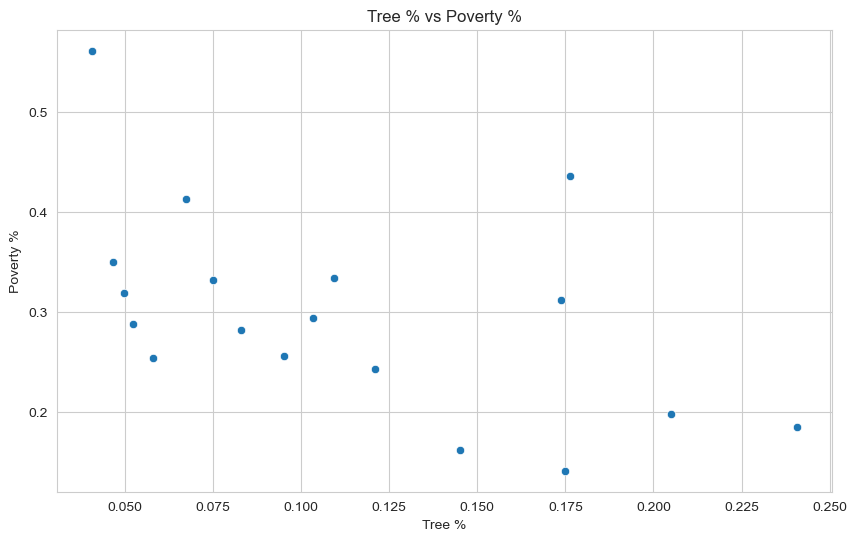

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tree_per', y='pov_per')
plt.title('Tree % vs Poverty %')
plt.xlabel('Tree %')
plt.ylabel('Poverty %')
plt.show()

In [36]:
statistics = df[['black_per', 'env_score']].agg(['mean', 'median', 'std', 'min', 'max'])


In [37]:
print(statistics)


        black_per  env_score
mean     0.071182   3.055556
median   0.038882   3.000000
std      0.080086   1.474179
min      0.010921   1.000000
max      0.341864   5.000000


This was me messing around with an API. I had trouble finding easy to use API data so ended up just practing with some SF data for ease of use. This data set is exploring several different environmental and demographic factors. Given the relationship of Environmental Justice in SF (and everywhere), I wanted to see if there was a relationship between the % of the Black Population and the Environmental Score. I wont be using this for my project but wanted practice using an API. 

Overall, this project will be used to support my capstone, and I am mostly interested in developing descriptive statistics about the state of housing and development in Richmond. I also want to paint a picture of the current economic situation for the average resident. All of this will help build a comprehensive picture of the city and will be used to argue for a city funded social housing program. 